Title: Classification Model Performance Metrics

Sub-Title: ROC Curve

Task 1: Plot ROC curve for credit risk prediction and calculate AUC score.

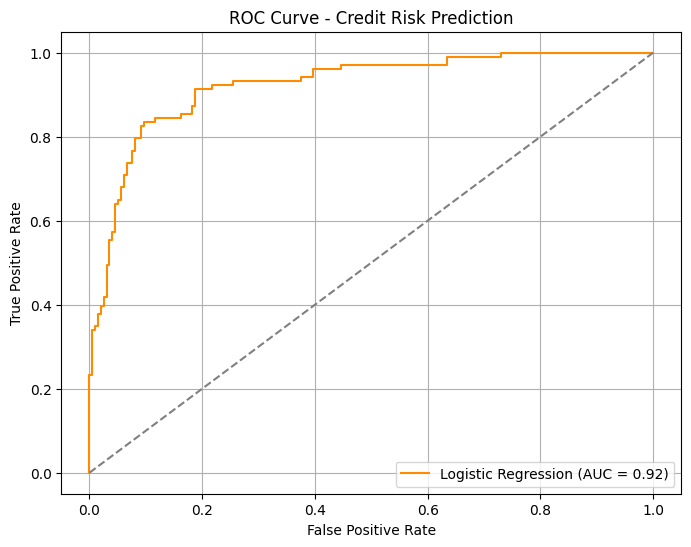

AUC Score: 0.9225


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Simulate credit risk dataset (1 = high risk, 0 = low risk)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, 
                           weights=[0.7, 0.3], random_state=42)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Step 5: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Credit Risk Prediction')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC Score: {auc_score:.4f}")



Task 2: Examine ROC curve of email classification model for spam detection.

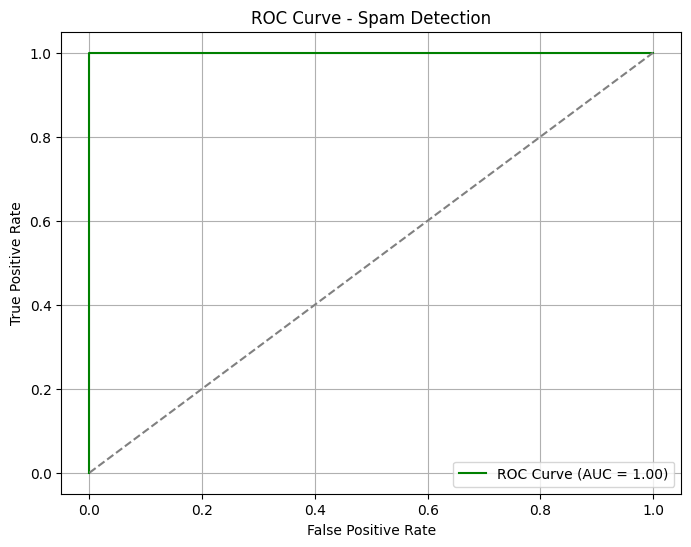

AUC Score: 1.0000


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Small hardcoded dataset
data = {
    'message': [
        "Free entry in 2 a wkly comp to win FA Cup final tkts",
        "U dun say so early hor... U c already then say...",
        "Nah I don't think he goes to usf, he lives around here though",
        "WINNER!! As a valued network customer you have been selected",
        "Had your mobile 11 months or more? You are eligible to Win",
        "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight",
        "SIX chances to win CASH! From 100 to 20,000 pounds",
        "Hey what’s up? Just checking in",
        "URGENT! Your Mobile No was awarded a Prize",
        "Ok lar... Joking wif u oni..."
    ],
    'label': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = ham
}

df = pd.DataFrame(data)

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=42)

# Step 3: Vectorize text
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 5: Predict probabilities
y_scores = model.predict_proba(X_test_tfidf)[:, 1]

# Step 6: ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Step 7: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Spam Detection')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")


Task 3: Use ROC-AUC to evaluate performance of a physical activity recognition model.

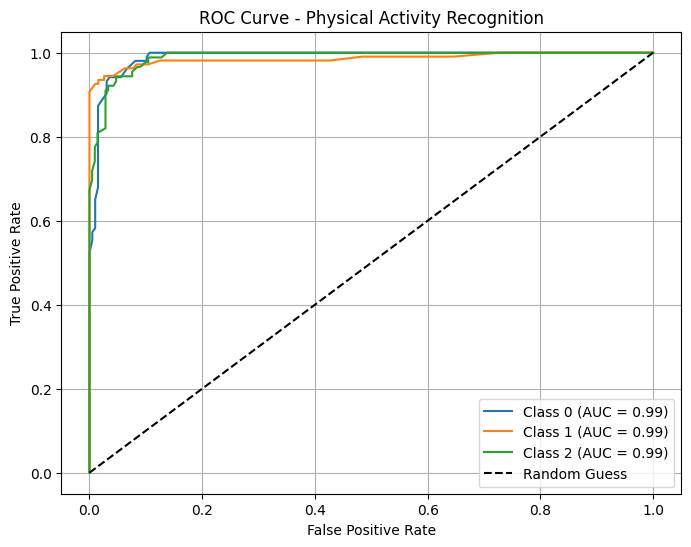

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Step 1: Simulate multi-class physical activity data
# Let's assume 3 classes: walking, running, sitting (can be replaced with real UCI HAR data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10,
                           n_redundant=5, n_clusters_per_class=1, random_state=42)
y_bin = label_binarize(y, classes=[0, 1, 2])  # For ROC AUC multi-class

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Step 3: Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict probabilities
y_score = clf.predict_proba(X_test)

# Step 5: Compute ROC AUC score for each class
n_classes = y_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:, 1])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_score[i][:, 1])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Physical Activity Recognition')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
